In [1]:
# pyplot_customtime.jl
#
#	Demonstrate reformatting of time axis
#
# gizmaa (https://gist.github.com/gizmaa/7214002)
# Julia 1.1.0
# 27.11.14
# Last Edit: 10.05.19

using PyPlot
using Dates
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

###################
##  Create Data  ##
###################
dt = Dates.Hour(1)
time = collect(DateTime(2014,11,20):dt:DateTime(2014,11,22))
y = 10rand(length(time))
#y = floor(100*rand(length(time))) # Fails unless the time span is very short
dfmt = Dates.DateFormat("yyyy-mm-dd HH:MM:SS")

font1 = Dict("fontname"=>"Sans","style"=>"normal")
time2 = Dates.value.(time)/1000/60/60/24 # Convert time from milliseconds from day 0 to days from day 0
timespan = "\n" * Dates.format(minimum(time),dfmt) * " - " * Dates.format(maximum(time),dfmt)

majorformatter = matplotlib.dates.DateFormatter("%d.%m.%Y")
minorformatter = matplotlib.dates.DateFormatter("%H:%M")
majorlocator = matplotlib.dates.DayLocator(interval=1)
minorlocator = matplotlib.dates.HourLocator(byhour=(8, 16));

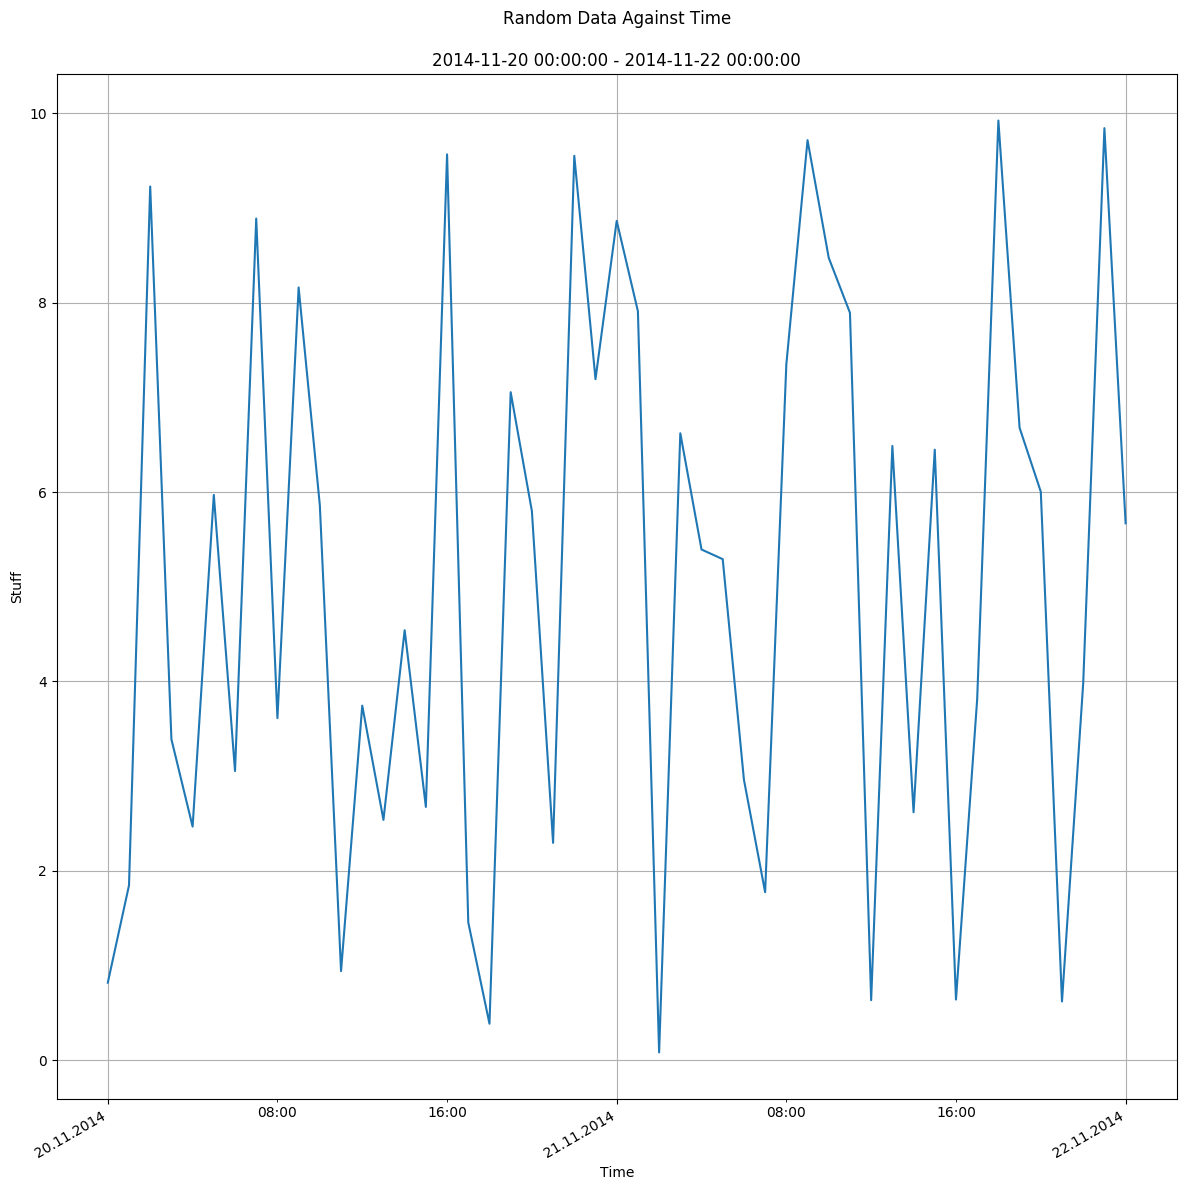

In [2]:
############
##  Plot  ##
############
fig = figure("pyplot_customtime",figsize=(12,12)) # Create a figure and save the handle
ax1 = PyPlot.axes()
p1 = plot_date(time2,y,linestyle="-",marker="None",label="test")
axis("tight")
PyPlot.title("Random Data Against Time\n" * timespan)
grid("on")
xlabel("Time")
ylabel("Stuff",fontdict=font1)
ax1.xaxis.set_major_formatter(majorformatter)
ax1.xaxis.set_minor_formatter(minorformatter)
ax1.xaxis.set_major_locator(majorlocator)
ax1.xaxis.set_minor_locator(minorlocator)
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
fig.canvas.draw() # Update the figure
PyPlot.tight_layout()
gcf() # Needed for IJulia to plot inline